In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
df = pd.read_excel(r'C:\Users\Laptops\Datamites\ModelMates_2024\default of credit card clients.xls', engine='xlrd')
# Drop first column
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)
df.drop(columns = ['ID'], inplace = True)
# For column Limit_bal
df['LIMIT_BAL'] = pd.to_numeric(df['LIMIT_BAL'], errors='coerce')
df['LIMIT_BAL_sqrt'] = np.sqrt(df['LIMIT_BAL'])
Q1 = df['LIMIT_BAL_sqrt'].quantile(0.25)
Q3 = df['LIMIT_BAL_sqrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['LIMIT_BAL_sqrt'] = df['LIMIT_BAL_sqrt'].clip(lower=lower_bound, upper=upper_bound)
# For column Bill_Amt1
df['BILL_AMT1'] = pd.to_numeric(df['BILL_AMT1'], errors='coerce')
df['BILL_AMT1_cbrt'] = np.cbrt(df['BILL_AMT1'])
Q1 = df['BILL_AMT1_cbrt'].quantile(0.25)
Q3 = df['BILL_AMT1_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['BILL_AMT1_cbrt'] = df['BILL_AMT1_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['BILL_AMT1_cbrt_binned'] = pd.qcut(df['BILL_AMT1_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['BILL_AMT1_cbrt_binned'] = df['BILL_AMT1_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column Bill_Amt2
df['BILL_AMT2'] = pd.to_numeric(df['BILL_AMT2'], errors='coerce')
df['BILL_AMT2_cbrt'] = np.cbrt(df['BILL_AMT2'])
Q1 = df['BILL_AMT2_cbrt'].quantile(0.25)
Q3 = df['BILL_AMT2_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['BILL_AMT2_cbrt'] = df['BILL_AMT2_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['BILL_AMT2_cbrt_binned'] = pd.qcut(df['BILL_AMT2_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['BILL_AMT2_cbrt_binned'] = df['BILL_AMT2_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)

# For column Bill_Amt3
df['BILL_AMT3'] = pd.to_numeric(df['BILL_AMT3'], errors='coerce')
df['BILL_AMT3_cbrt'] = np.cbrt(df['BILL_AMT3'])
Q1 = df['BILL_AMT3_cbrt'].quantile(0.25)
Q3 = df['BILL_AMT3_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['BILL_AMT3_cbrt'] = df['BILL_AMT3_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['BILL_AMT3_cbrt_binned'] = pd.qcut(df['BILL_AMT3_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['BILL_AMT3_cbrt_binned'] = df['BILL_AMT3_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column Bill_Amt4
df['BILL_AMT4'] = pd.to_numeric(df['BILL_AMT4'], errors='coerce')
df['BILL_AMT4_cbrt'] = np.cbrt(df['BILL_AMT4'])
Q1 = df['BILL_AMT4_cbrt'].quantile(0.25)
Q3 = df['BILL_AMT4_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['BILL_AMT4_cbrt'] = df['BILL_AMT4_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['BILL_AMT4_cbrt_binned'] = pd.qcut(df['BILL_AMT4_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['BILL_AMT4_cbrt_binned'] = df['BILL_AMT4_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column Bill_Amt5
df['BILL_AMT5'] = pd.to_numeric(df['BILL_AMT5'], errors='coerce')
df['BILL_AMT5_cbrt'] = np.cbrt(df['BILL_AMT5'])
Q1 = df['BILL_AMT5_cbrt'].quantile(0.25)
Q3 = df['BILL_AMT5_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['BILL_AMT5_cbrt'] = df['BILL_AMT5_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['BILL_AMT5_cbrt_binned'] = pd.qcut(df['BILL_AMT5_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['BILL_AMT5_cbrt_binned'] = df['BILL_AMT5_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column Bill_Amt6
df['BILL_AMT6'] = pd.to_numeric(df['BILL_AMT6'], errors='coerce')
df['BILL_AMT6_cbrt'] = np.cbrt(df['BILL_AMT6'])
Q1 = df['BILL_AMT6_cbrt'].quantile(0.25)
Q3 = df['BILL_AMT6_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['BILL_AMT6_cbrt'] = df['BILL_AMT6_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['BILL_AMT6_cbrt_binned'] = pd.qcut(df['BILL_AMT6_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['BILL_AMT6_cbrt_binned'] = df['BILL_AMT6_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column pay_Amt1
df['PAY_AMT1']=pd.to_numeric(df['PAY_AMT1'],errors='coerce')
df['PAY_AMT1_cbrt'] = np.cbrt(df['PAY_AMT1'])
Q1 = df['PAY_AMT1_cbrt'].quantile(0.25)
Q3 = df['PAY_AMT1_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['PAY_AMT1_cbrt'] = df['PAY_AMT1_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['PAY_AMT1_cbrt_binned'] = pd.qcut(df['PAY_AMT1_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['PAY_AMT1_cbrt_binned'] = df['PAY_AMT1_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column pay_Amt2
df['PAY_AMT2']=pd.to_numeric(df['PAY_AMT2'],errors='coerce')
df['PAY_AMT2_cbrt']=np.cbrt(df['PAY_AMT2'])
Q1 = df['PAY_AMT2_cbrt'].quantile(0.25)
Q3 = df['PAY_AMT2_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['PAY_AMT2_cbrt'] = df['PAY_AMT2_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['PAY_AMT2_cbrt_binned'] = pd.qcut(df['PAY_AMT2_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['PAY_AMT2_cbrt_binned'] = df['PAY_AMT2_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column pay_Amt3
df['PAY_AMT3']=pd.to_numeric(df['PAY_AMT3'],errors='coerce')
df['PAY_AMT3_cbrt']=np.cbrt(df['PAY_AMT3'])
Q1 = df['PAY_AMT3_cbrt'].quantile(0.25)
Q3 = df['PAY_AMT3_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['PAY_AMT3_cbrt'] = df['PAY_AMT3_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['PAY_AMT3_cbrt_binned'] = pd.qcut(df['PAY_AMT3_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['PAY_AMT3_cbrt_binned'] = df['PAY_AMT3_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column pay_Amt4
df['PAY_AMT4']=pd.to_numeric(df['PAY_AMT4'],errors='coerce')
df['PAY_AMT4_cbrt']=np.cbrt(df['PAY_AMT4'])
Q1 = df['PAY_AMT4_cbrt'].quantile(0.25)
Q3 = df['PAY_AMT4_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['PAY_AMT4_cbrt'] = df['PAY_AMT4_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['PAY_AMT4_cbrt_binned'] = pd.qcut(df['PAY_AMT4_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['PAY_AMT4_cbrt_binned'] = df['PAY_AMT4_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# For column pay_Amt5
df['PAY_AMT5']=pd.to_numeric(df['PAY_AMT5'],errors='coerce')
df['PAY_AMT5_cbrt']=np.cbrt(df['PAY_AMT5'])
Q1 = df['PAY_AMT5_cbrt'].quantile(0.25)
Q3 = df['PAY_AMT5_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['PAY_AMT5_cbrt'] = df['PAY_AMT5_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['PAY_AMT5_cbrt_binned'] = pd.qcut(df['PAY_AMT5_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['PAY_AMT5_cbrt_binned'] = df['PAY_AMT5_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# for column pay_Amt6
df['PAY_AMT6']=pd.to_numeric(df['PAY_AMT6'],errors='coerce')
df['PAY_AMT6_cbrt']=np.cbrt(df['PAY_AMT6'])
Q1 = df['PAY_AMT6_cbrt'].quantile(0.25)
Q3 = df['PAY_AMT6_cbrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['PAY_AMT6_cbrt'] = df['PAY_AMT6_cbrt'].clip(lower=lower_bound, upper=upper_bound)
df['PAY_AMT6_cbrt_binned'] = pd.qcut(df['PAY_AMT6_cbrt'], q=3, labels=['Low', 'Medium', 'High'])
df['PAY_AMT6_cbrt_binned'] = df['PAY_AMT6_cbrt_binned'].replace({'Low': 1, 'Medium': 2, 'High': 3}).astype(int)
# for column age
df['AGE']=pd.to_numeric(df['AGE'],errors='coerce')
df['AGE_sqrt']=np.sqrt(df['AGE'])
Q1 = df['AGE_sqrt'].quantile(0.25)
Q3 = df['AGE_sqrt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['AGE_sqrt'] = df['AGE_sqrt'].clip(lower=lower_bound, upper=upper_bound)
df['EDUCATION'] = df['EDUCATION'].replace([4, 5, 6, 0], 3)
df['MARRIAGE'] = df['MARRIAGE'].replace([0], 3)
df.drop(columns=['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','BILL_AMT1_cbrt','BILL_AMT2_cbrt','BILL_AMT3_cbrt','BILL_AMT4_cbrt','BILL_AMT5_cbrt',
            'BILL_AMT6_cbrt','PAY_AMT1_cbrt','PAY_AMT2_cbrt','PAY_AMT3_cbrt','PAY_AMT4_cbrt','PAY_AMT5_cbrt','PAY_AMT6_cbrt'],axis=1,inplace=True)
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX', 'default payment next month']] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX', 'default payment next month']].astype(int)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['LIMIT_BAL_sqrt', 'AGE_sqrt']] = scaler.fit_transform(df[['LIMIT_BAL_sqrt', 'AGE_sqrt']])


# EDA

#### Univarient Analysis

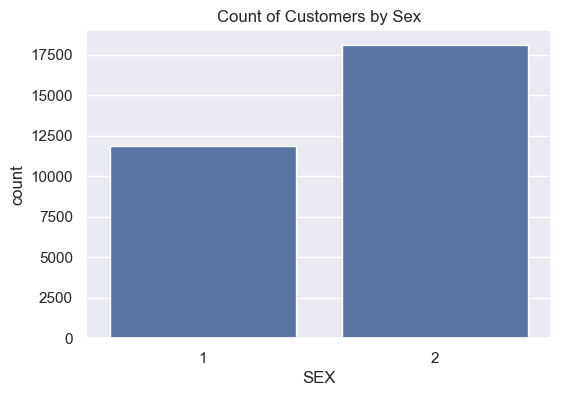

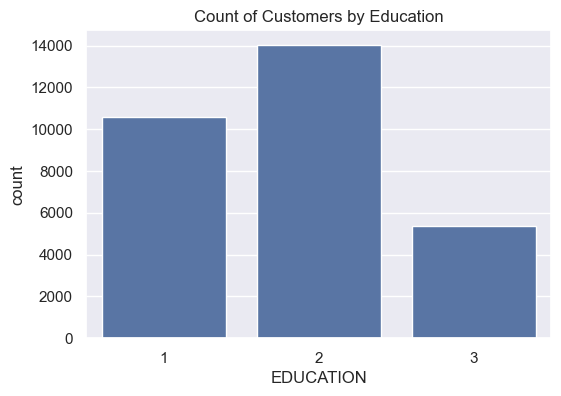

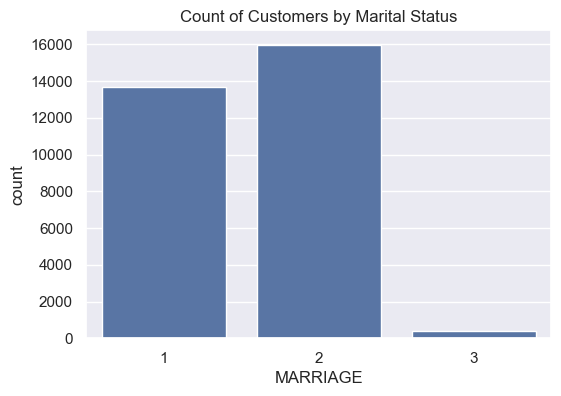

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Set up the plot style
sns.set(style="darkgrid")

# Step 4: Plot Count Plot for 'SEX'
plt.figure(figsize=(6,4))
sns.countplot(x='SEX', data=df)
plt.title('Count of Customers by Sex')
plt.show()

# Step 5: Plot Count Plot for 'EDUCATION'
plt.figure(figsize=(6,4))
sns.countplot(x='EDUCATION', data=df)
plt.title('Count of Customers by Education')
plt.show()

# Step 6: Plot Count Plot for 'MARRIAGE'
plt.figure(figsize=(6,4))
sns.countplot(x='MARRIAGE', data=df)
plt.title('Count of Customers by Marital Status')
plt.show()


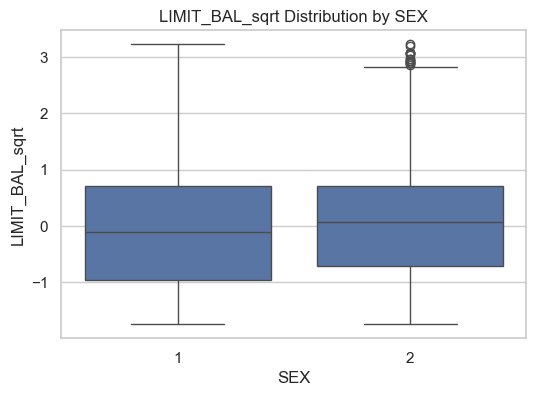

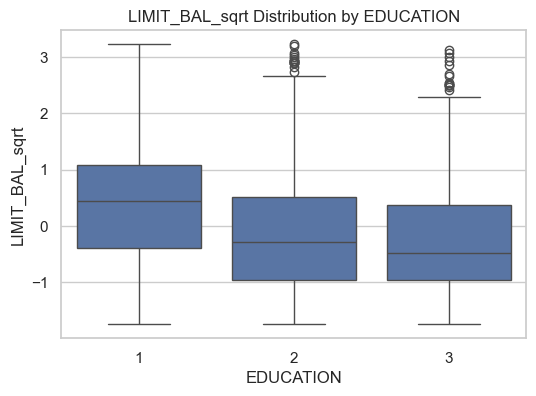

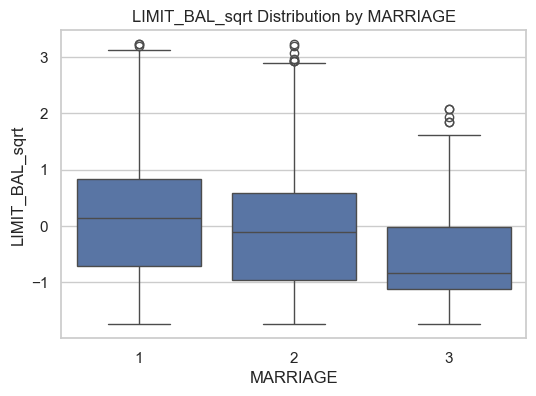

In [14]:
# for transformed limit balance sqrt column

# Step 2: Set up the plot style
sns.set(style="whitegrid")

# Step 3: Box Plot for LIMIT_BAL vs SEX
plt.figure(figsize=(6,4))
sns.boxplot(x='SEX', y='LIMIT_BAL_sqrt', data=df)
plt.title('LIMIT_BAL_sqrt Distribution by SEX')
plt.show()

# Step 4: Box Plot for LIMIT_BAL vs EDUCATION
plt.figure(figsize=(6,4))
sns.boxplot(x='EDUCATION', y='LIMIT_BAL_sqrt', data=df)
plt.title('LIMIT_BAL_sqrt Distribution by EDUCATION')
plt.show()

# Step 5: Box Plot for LIMIT_BAL vs MARRIAGE
plt.figure(figsize=(6,4))
sns.boxplot(x='MARRIAGE', y='LIMIT_BAL_sqrt', data=df)
plt.title('LIMIT_BAL_sqrt Distribution by MARRIAGE')
plt.show()

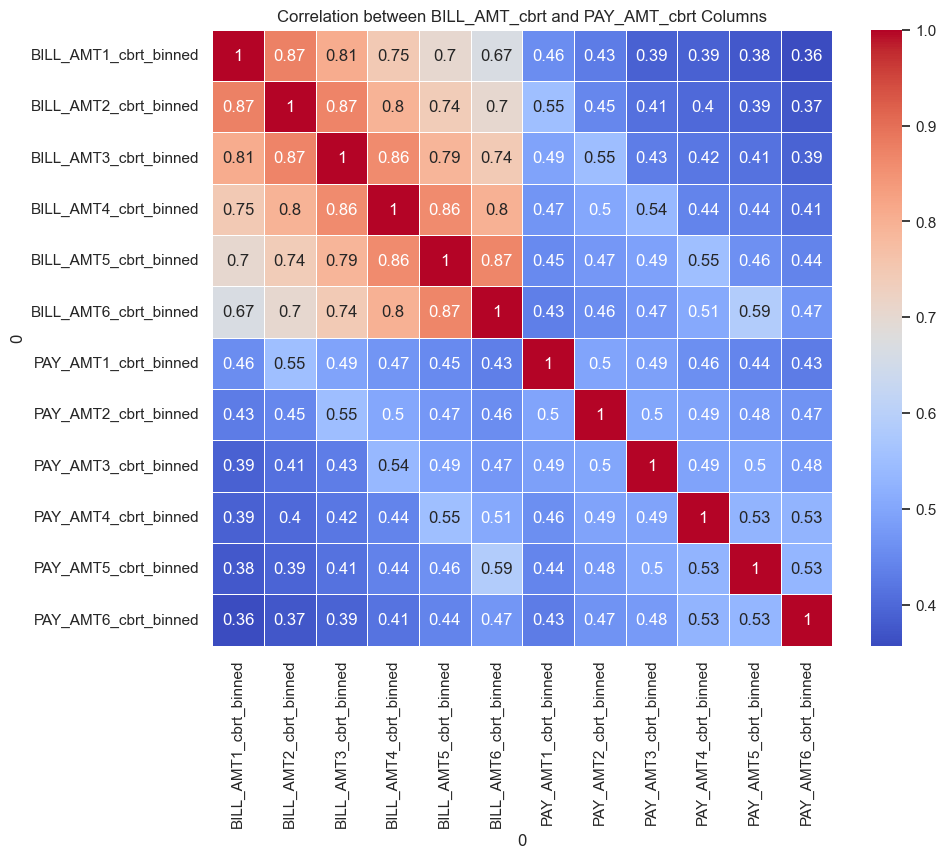

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only the bill and payment amount columns
bill_columns = ['BILL_AMT1_cbrt_binned', 'BILL_AMT2_cbrt_binned', 'BILL_AMT3_cbrt_binned', 'BILL_AMT4_cbrt_binned', 'BILL_AMT5_cbrt_binned', 'BILL_AMT6_cbrt_binned']
payment_columns = ['PAY_AMT1_cbrt_binned', 'PAY_AMT2_cbrt_binned', 'PAY_AMT3_cbrt_binned', 'PAY_AMT4_cbrt_binned', 'PAY_AMT5_cbrt_binned', 'PAY_AMT6_cbrt_binned']

# Step 2: Create a new DataFrame for bill and payment amounts
bill_payment_df = df[bill_columns + payment_columns]

# Step 3: Calculate the correlation matrix
correlation_matrix = bill_payment_df.corr()

# Step 4: Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between BILL_AMT_cbrt and PAY_AMT_cbrt Columns')
plt.show()

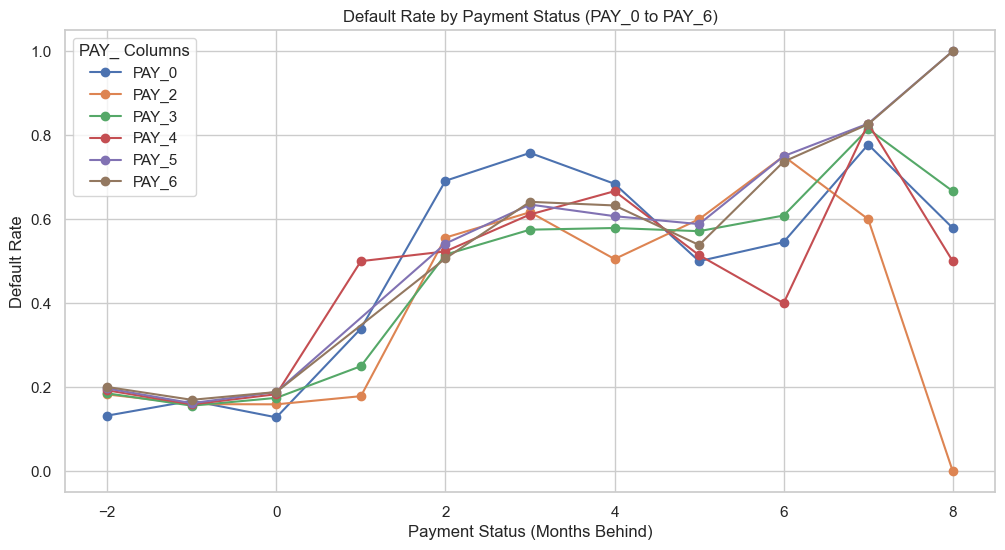

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define the payment status columns
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Step 2: Initialize a list to store default rates for each payment status
default_rates = []

# Step 3: Calculate the default rate for each payment status column
for col in pay_columns:
    # Group by payment status and calculate the mean of default payments
    default_rate_by_status = df.groupby(col)['default payment next month'].mean()
    # Store the result as a DataFrame for easy plotting
    default_rates.append(default_rate_by_status)

# Step 4: Plot the default rates for each payment status column
plt.figure(figsize=(12, 6))

for i, col in enumerate(pay_columns):
    plt.plot(default_rates[i].index, default_rates[i].values, marker='o', label=col)

# Step 5: Customize the plot
plt.title('Default Rate by Payment Status (PAY_0 to PAY_6)')
plt.xlabel('Payment Status (Months Behind)')
plt.ylabel('Default Rate')
plt.legend(title='PAY_ Columns')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']
# Handling imbalanced dataset using SMOTE techniques
# Split the original data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

def scoring(y_test,y_predict):
    print('accuracy_score: ',format(accuracy_score(y_test,y_predict),"0.2f"))
    print('classification_report', classification_report(y_test,y_predict))
    print('confusion_matrix', confusion_matrix(y_test,y_predict))

randomForestClassifier = RandomForestClassifier()
randomForestClassifier.fit(X_train, y_train)
print('Random Forest Classifer')
print('On Training set')
scoring(y_train, randomForestClassifier.predict(X_train))
print('On Testing set')
scoring(y_test, randomForestClassifier.predict(X_test))

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [10]:
models = {
"Logistic Regression": LogisticRegression(random_state=42),
"Decision Tree": DecisionTreeClassifier(random_state=42),
"Random Forest": RandomForestClassifier(random_state=42),
"XGBoost": XGBClassifier(random_state=42),
"SVM": SVC(probability=True, random_state=42),
"KNN": KNeighborsClassifier(),
"Naive Bayes": GaussianNB()
}

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# To store the results of each model
results = {}

# Loop through models
for name, model in models.items():
    # Train the model
    model.fit(X_resampled, y_resampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC Score": auc
    }

# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, score in metrics.items():
        print(f"{metric}: {score}")
    print("\n")

Model: Logistic Regression
Accuracy: 0.7141666666666666
Precision: 0.40261627906976744
Recall: 0.6329017517136329
F1 Score: 0.49215279834172343
AUC Score: 0.7370161931260989


Model: Decision Tree
Accuracy: 0.7048333333333333
Precision: 0.36481700118063753
Recall: 0.4706778370144707
F1 Score: 0.4110409045560359
AUC Score: 0.6197044668770763


Model: Random Forest
Accuracy: 0.7773333333333333
Precision: 0.4913207547169811
Recall: 0.49581111957349583
F1 Score: 0.4935557240333586
AUC Score: 0.7496964997413891


Model: XGBoost
Accuracy: 0.8026666666666666
Precision: 0.566289825282631
Recall: 0.41964965727341963
F1 Score: 0.4820647419072616
AUC Score: 0.7492078769183971


Model: SVM
Accuracy: 0.752
Precision: 0.4517374517374517
Recall: 0.6237623762376238
F1 Score: 0.5239923224568138
AUC Score: 0.7570541162369835


Model: KNN
Accuracy: 0.6833333333333333
Precision: 0.36616507067943455
Recall: 0.6115765422696116
F1 Score: 0.45807187678265826
AUC Score: 0.7046366032280305


Model: Naive Bayes
